In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams['figure.facecolor'] = 'w'
plt.style.use('dark_background')
from scipy.stats import binom as binomial
import ipywidgets as widgets

In [2]:
p_bob_ml, p_bob_bayes = (3/8)**3, 1/11
print(f'Max-Likelihood prob Bob wins: {p_bob_ml:.3f}')
print(f'Bayesian prob Bob wins      : {p_bob_bayes:.3f}')

Max-Likelihood prob Bob wins: 0.053
Bayesian prob Bob wins      : 0.091


In [3]:
p_bob = []
n_games = 10000
n_simulations = 1000
for _ in range(n_simulations):
    # generate random sampling of prob for Bob wining the game
    p = np.random.random(n_games)
    # find probability of the observed state (Alice=5, Bob=3)
    prob_5_3 = binomial.pmf(3,8,p)
    
    # find good games (when the observed state indeed occurs)
    rdn_nrs      = np.random.random(n_games)   # sample random numbers
    good_games   = np.array(prob_5_3 > rdn_nrs)  # boolean array
    n_good_games = np.sum(good_games)            # number of "good games"
    #-----------------------------------------------------------------------------------
    # from here we only focus on the "good games"
    # find probability that Bob wins one point
    p_bob_wins_point = p[good_games]
    # find probability that Bob wins the game
    p_bob_wins_game = p_bob_wins_point**3
    
    # find whether Bob wins the game
    rdn_nrs2        = np.random.random(n_good_games)        # sample random numbers
    bob_wins_game   = np.array(p_bob_wins_game > rdn_nrs2)  # boolean array
    n_bob_wins_game = np.sum(bob_wins_game)                 # number of games won by Bob
    
    # save fraction of games ("frequentist probability") won by Bob
    p_bob.append(n_bob_wins_game/n_good_games)

In [16]:
# fig, ax = plt.subplots(figsize=(8, 5))

# xmin, xmax = 0.02, 0.13
# binwidth   = 0.005
# ax.hist(p_bob, color='y', alpha=.95, histtype='stepfilled', ec='w', bins=np.arange(min(p_bob), max(p_bob) + binwidth, binwidth))#, bins=130)
# ax.axvline(x=p_bob_ml, c='tomato', lw=3, label='max-Likelihood')
# ax.axvline(x=p_bob_bayes, c='lime', lw=3, label='Bayesian')
# ax.set(xlabel='fraction of games won by Bob', ylabel='count', xlim=[xmin,xmax])
# ax.grid(lw=1, alpha=0.2, zorder=0)
# ax.legend();

In [4]:
def function(n_games=1):
    fig, ax = plt.subplots(figsize=(8, 5))
    xmin, xmax = 0.02, 0.13
    binwidth   = 0.005
    ax.axvline(x=p_bob_ml, c='tomato', lw=3, label='max-Likelihood')
    ax.axvline(x=p_bob_bayes, c='lime', lw=3, label='Bayesian')
    ax.hist(p_bob[:n_games], color='y', alpha=.95, histtype='stepfilled', ec='w', bins=np.arange(min(p_bob), max(p_bob) + binwidth, binwidth), label='simulation')
    ax.set(xlabel='fraction of games won by Bob', ylabel='count', xlim=[xmin,xmax], ylim=[0,250])
    ax.grid(lw=1, alpha=0.2, zorder=0)
    ax.legend(loc='upper left');

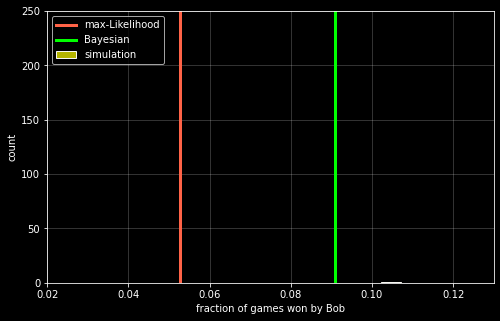

In [5]:
function(n_games=1)

In [6]:
widgets.interact(function, n_games=(1, 1000, 1));

interactive(children=(IntSlider(value=1, description='n_games', max=1000, min=1), Output()), _dom_classes=('wi…